In [112]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(r'C:\Users\Auditics Lap-\Downloads\card_transdata.csv')
data.head(2)

x = data.drop(columns = ['fraud'])
y = data['fraud']

smote = SMOTE()
x_resample,y_resample = smote.fit_resample(x,y)

x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2)

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)

print('classification_report :',cr)
print('confusion_matrix :',cm)
print('roc_auc_score :',roc)

print('Fraud prediction Report :', y_pred)

classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00    182065
           1       1.00      1.00      1.00    182974

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039

confusion_matrix : [[181973     92]
 [   101 182873]]
roc_auc_score : 0.9994713474852741
Fraud prediction Report : [1 0 1 ... 0 1 1]


<function matplotlib.pyplot.show(close=None, block=None)>

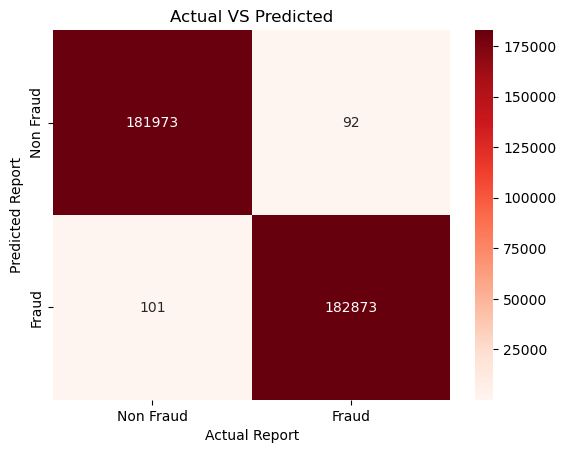

In [114]:
import matplotlib.pyplot as plt
import seaborn as sea

sea.heatmap(cm,cmap ='Reds',annot = True,fmt ='d',xticklabels = ['Non Fraud','Fraud'],yticklabels=['Non Fraud','Fraud'])
plt.title('Actual VS Predicted')
plt.xlabel('Actual Report')
plt.ylabel('Predicted Report')
plt.show

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,f1_score,r2_score

In [116]:
f1 = f1_score(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('F1 Score : ',f1)
print('R2 Score : ', r2)

F1 Score :  0.9994725896939107
R2 Score :  0.997885144362482


In [120]:
new = pd.read_csv(r'C:\Users\Auditics Lap-\Downloads\sample_prediction_data.csv')
#now = new.iloc[-1]
#pred = now[['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip','used_pin_number', 'online_order']].to_frame().T

predicted = model.predict(new)
print('Predicted Data : ', predicted)



Predicted Data :  [0 0 0 0 0]
